In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [20]:
df_crime = pd.read_csv('crime.csv')
print(df_crime.columns)


Index(['Report Number', 'Report Date', 'Occur Date', 'Occur Time',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Location', 'Shift Occurence', 'Location Type',
       'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 'Latitude',
       'Longitude'],
      dtype='object')


C:\Users\wpyrt\AppData\Local\Temp\ipykernel_13800\1519301158.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crime = pd.read_csv('crime.csv')


In [21]:
time_data = df_crime["Report Date"]

In [22]:
time_data = df_crime["Report Date"]

time_data = pd.to_datetime(time_data)

date_counts = time_data.value_counts().sort_index()

result_df = date_counts.reset_index()
result_df.columns = ['Date', 'Count']

result_df.to_csv('date_counts.csv', index=False)

print("Plik 'date_counts.csv' został zapisany.")

Plik 'date_counts.csv' został zapisany.


In [23]:
df_count = pd.read_csv('date_counts.csv')
print(df_count.columns)

Index(['Date', 'Count'], dtype='object')


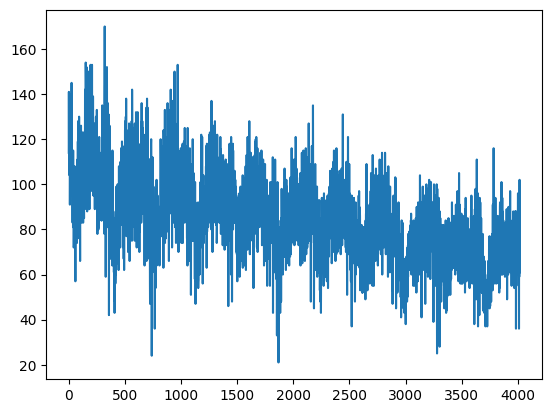

In [24]:
count = df_count["Count"]
plt.plot(count)